In [3]:


import numpy as np 
import pandas as pd 



import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
import pickle as pkl


In [4]:
df=pd.read_csv('diabetes1.csv')

In [5]:
df.shape

(768, 9)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
plot=df.drop(['Outcome'],axis=1)

d:\software\py 3.6.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


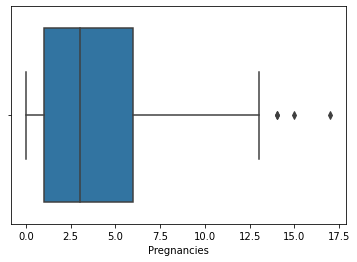

d:\software\py 3.6.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


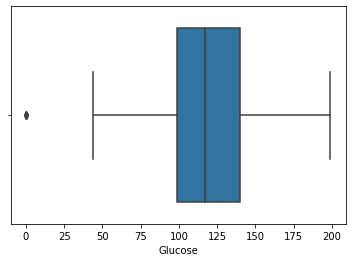

d:\software\py 3.6.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


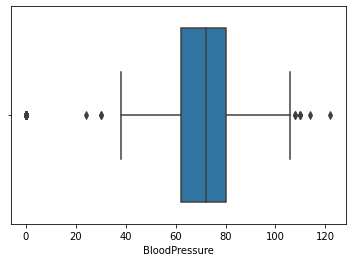

d:\software\py 3.6.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


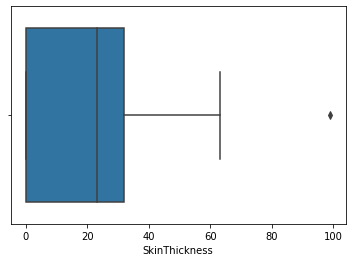

d:\software\py 3.6.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


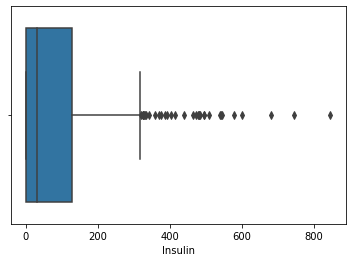

d:\software\py 3.6.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


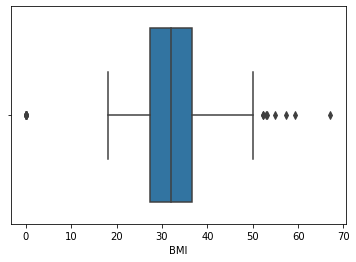

d:\software\py 3.6.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


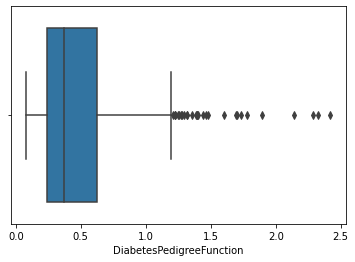

d:\software\py 3.6.8\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


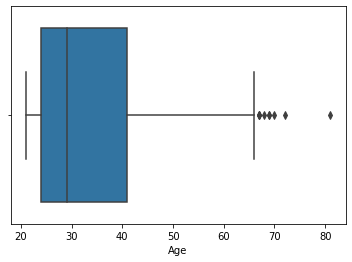

In [15]:
for i in plot:
    sns.boxplot(df[i])
    plt.show()

d:\software\py 3.6.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


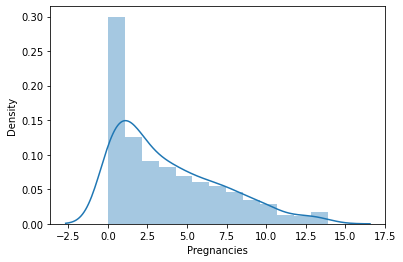

d:\software\py 3.6.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


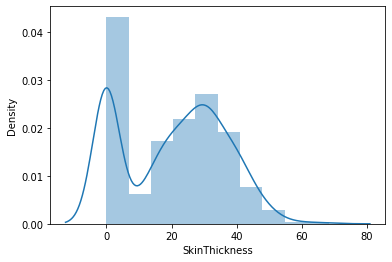

d:\software\py 3.6.8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


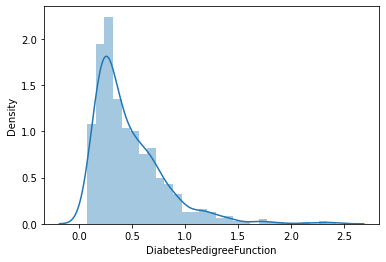

In [26]:
sns.distplot(df['Pregnancies'])
plt.show()
sns.distplot(df['SkinThickness'])
plt.show()
sns.distplot(df['DiabetesPedigreeFunction'])
plt.show()

In [22]:
def find_outliers(feature):
    mean=df[feature].mean()
    std=df[feature].std()
    out=[]
    for i in df[feature]:
        value=(i-mean)/std
        if value>3:
            out.append(i)
    return out

In [21]:
def replace_outliers(out,feature):
    minv=min(out)
    std=df[feature].std()*3+df[feature].mean()
    df[feature]=np.where(df[feature]>=minv,std,df[feature])

In [27]:
out=find_outliers('Pregnancies')
out1=find_outliers('SkinThickness')
out2=find_outliers('DiabetesPedigreeFunction')
replace_outliers(out,'Pregnancies')
replace_outliers(out1,'SkinThickness')
replace_outliers(out2,'DiabetesPedigreeFunction')

<AxesSubplot:>

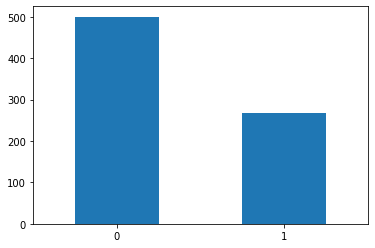

In [28]:
df['Outcome'].value_counts().plot(kind='bar',rot=0)

In [29]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [30]:
smt=SMOTETomek()
X_res,y_res=smt.fit_resample(X,y)

<AxesSubplot:>

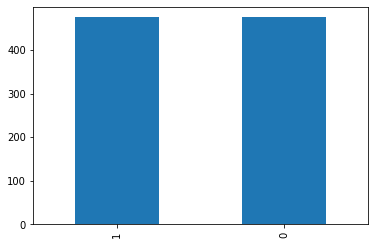

In [31]:
y_res.value_counts().plot(kind='bar')

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=0)

In [33]:
model=LogisticRegression(max_iter=1200000)

In [34]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1200000)

In [35]:
y_pred=model.predict(X_test)

In [36]:
confusion_matrix(y_test,y_pred)

array([[70, 15],
       [27, 78]], dtype=int64)

In [37]:
y_test.value_counts()

1    105
0     85
Name: Outcome, dtype: int64

In [38]:
accuracy_score(y_test,y_pred)

0.7789473684210526

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        85
           1       0.84      0.74      0.79       105

    accuracy                           0.78       190
   macro avg       0.78      0.78      0.78       190
weighted avg       0.79      0.78      0.78       190



In [40]:
model.predict_proba(X_test)

array([[0.06254213, 0.93745787],
       [0.84541616, 0.15458384],
       [0.57188304, 0.42811696],
       [0.98809341, 0.01190659],
       [0.70171308, 0.29828692],
       [0.86120793, 0.13879207],
       [0.29708129, 0.70291871],
       [0.15177474, 0.84822526],
       [0.48412856, 0.51587144],
       [0.80145025, 0.19854975],
       [0.1918399 , 0.8081601 ],
       [0.82731679, 0.17268321],
       [0.85269442, 0.14730558],
       [0.80196711, 0.19803289],
       [0.0274427 , 0.9725573 ],
       [0.01933359, 0.98066641],
       [0.53420773, 0.46579227],
       [0.0401458 , 0.9598542 ],
       [0.65466081, 0.34533919],
       [0.95418445, 0.04581555],
       [0.39715332, 0.60284668],
       [0.08278007, 0.91721993],
       [0.74996181, 0.25003819],
       [0.81843179, 0.18156821],
       [0.99588371, 0.00411629],
       [0.7966552 , 0.2033448 ],
       [0.91274779, 0.08725221],
       [0.12956193, 0.87043807],
       [0.02654805, 0.97345195],
       [0.90065638, 0.09934362],
       [0.